In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
train = pd.read_csv("../titanic/train.csv")
test = pd.read_csv("../titanic//test.csv")

SEED = 42

train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [88]:
train.shape, train.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
train.columns = [col.lower() for col in train.columns]
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [92]:
train.head

<bound method NDFrame.head of      passengerid  survived  pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  name     sex   age  sibsp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

# 타겟 데이터 확인

In [93]:
new_survived = pd.Categorical(train["survived"])
new_survived[:5]

[0, 1, 1, 1, 0]
Categories (2, int64): [0, 1]

In [94]:
new_survived.describe()

,counts,freqs
categories,,
0,549,0.616162
1,342,0.383838


# 데이터 분리

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x = train.drop('survived', axis=1)
y = train['survived']

x_tr, x_te, y_tr, y_te = train_test_split(x,y, random_state=SEED, test_size=0.2)

In [97]:
x_tr.shape, x_te.shape

((712, 11), (179, 11))

In [98]:
new_survived = pd.Categorical(y_tr)
new_survived = new_survived.rename_categories(["Died","Survived"])
print(new_survived[:5])
new_survived.describe()

['Died', 'Died', 'Died', 'Died', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,444,0.623596
Survived,268,0.376404


# Data cleansing

> 데이터를 올바르고 효율적으로 사용하기 위해서는 완결성, 유일성, 통일성의 특징을 가지는 데이터를 사용해야 한다

완결성

    - 결측 값을 제거

유일성

    -중복 데이터 제거

통일성

    - 이상치를 제거

### 중복데이터 처리

In [99]:
# 중복제거
# inplace 고냥 바로 train 데이터에 적용시켜버림

print(f'before: {train.shape}')
train.drop_duplicates(keep='first', inplace =True, ignore_index=True)
print(f'after: {train.shape}')

before: (891, 12)
after: (891, 12)


### 필요없는 데이터

In [100]:
train['passengerid'].nunique(), train.shape[0]

(891, 891)

In [101]:
train.drop('passengerid', axis=1, inplace=True)
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 결측치(Missing Value)

- Nan: 숫자가 아닌(Not a Number)
- Null: 아무것도 존재하지 않음
- undefined: 정의되지 않음

- 완전 무작위 결측
> 다른 변수와 연관이 없는 결측치, 독립변수

- 무작위 결측
> x와 연관된 결측치

- 비무작위 결측
> y값과 연관된 결측치

## 결측치 탐색

### 통계 탐색

In [102]:
x_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   name         712 non-null    object 
 3   sex          712 non-null    object 
 4   age          572 non-null    float64
 5   sibsp        712 non-null    int64  
 6   parch        712 non-null    int64  
 7   ticket       712 non-null    object 
 8   fare         712 non-null    float64
 9   cabin        159 non-null    object 
 10  embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [103]:
x_tr.isnull().sum()

passengerid      0
pclass           0
name             0
sex              0
age            140
sibsp            0
parch            0
ticket           0
fare             0
cabin          553
embarked         2
dtype: int64

In [104]:
x_tr.isnull().sum().sort_values(ascending=False)

cabin          553
age            140
embarked         2
passengerid      0
pclass           0
name             0
sex              0
sibsp            0
parch            0
ticket           0
fare             0
dtype: int64

In [105]:
(x_tr.isnull().sum() / x_tr.shape[0]).round(4).sort_values(ascending=False)

cabin          0.7767
age            0.1966
embarked       0.0028
passengerid    0.0000
pclass         0.0000
name           0.0000
sex            0.0000
sibsp          0.0000
parch          0.0000
ticket         0.0000
fare           0.0000
dtype: float64

### 그래프 탑색

<AxesSubplot: >

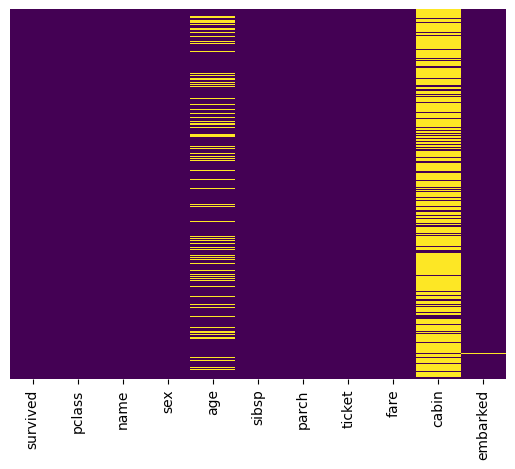

In [106]:
sns.heatmap(train.isnull(), yticklabels= False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'total missing vlaue(%)')

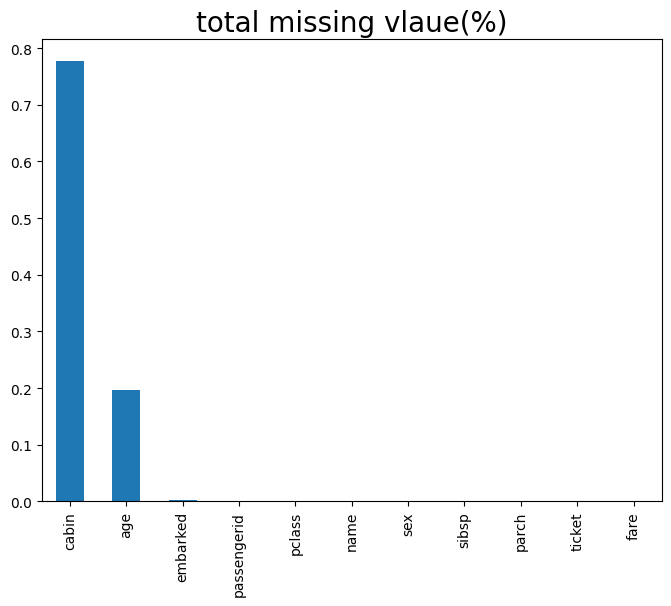

In [107]:
total = x_tr.isnull().sum().sort_values(ascending=False)
percent = (x_tr.isnull().sum() / x_tr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind = "bar", figsize=(8,6), fontsize = 10)

plt.xlabel("",fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("total missing vlaue(%)", fontsize = 20)

In [108]:
x_tr['hasCabin'] = x_tr['cabin'].isnull().apply(lambda x:0 if x == True else 1)
x_tr['hasAge'] = x_tr['age'].isnull().apply(lambda x:0 if x == True else 1)

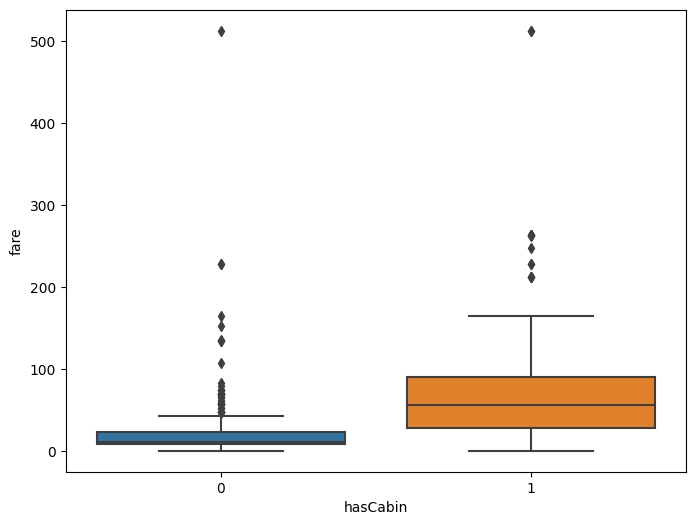

In [160]:
# cabin의 값이 있는 사람들의 fare 가 높은것을 볼 수 있다
data = pd.concat([x_tr['fare'], x_tr['hasCabin']], axis=1)
f, ax = plt.subplots(figsize =(8,6))
fig = sns.boxplot(x='hasCabin', y ="fare", data = data)

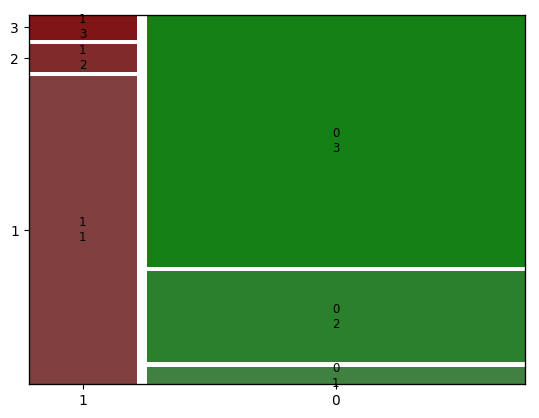

In [110]:
# pclass 가 3>2>1 순으로 hasCabin이 0일 확률이 높다
# 즉, pclass가 1이면 Cabin값이 null이 아닐 확률이 높은 것을 알 수 있다

from statsmodels.graphics.mosaicplot import mosaic

mosaic(x_tr, ['hasCabin', 'pclass'], gap=0.02)
plt.show()

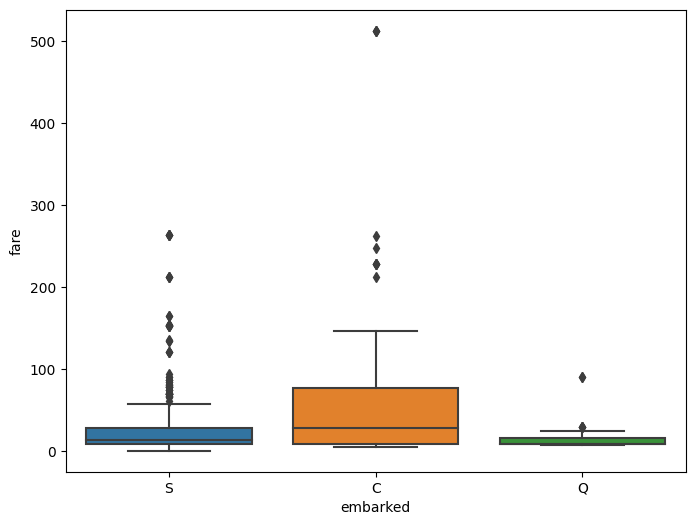

In [111]:
data = pd.concat([x_tr['fare'], x_tr['embarked']], axis=1)
f, ax = plt.subplots(figsize =(8,6))
fig = sns.boxplot(x='embarked', y = 'fare', data= data)

<AxesSubplot: xlabel='embarked', ylabel='fare'>

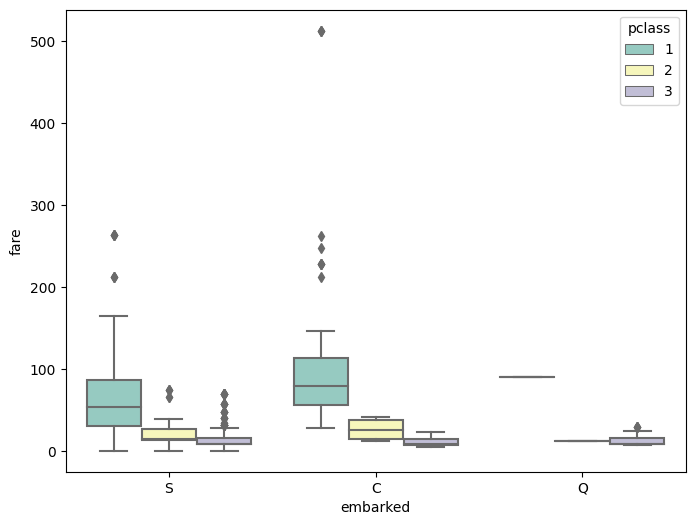

In [112]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x="embarked", y="fare", hue = "pclass",
            data = x_tr, palette="Set3")

## 결측치 처리

### pandas 사용

- df.dropna()
  - df.dropna(axis=0): row 삭제
  - df.dropna(axis=1): column 삭제
  - df[['컬럼명']].dropna(axis=1): column 삭제
  - df.dropna(subset=['원하는 행']): 원하는 행의 결측값이 있는 부분을 기준으로 row 삭제
- df.fillna()
  - df[['컬럼명']].fillna(원하는 값): 원하는 값으로 채우기
  - df[['컬럼명']].fillna(method='ffill'): 결측값을 앞방향의 값으로 채운다.
  - df[['컬럼명']].fillna(method='bfill'): 결측값을 뒤방향의 값으로 채운다.
- np.where(pd.notnull(df['null값보유컬럼']==True, df['null값보유컬럼],df['null값없는컬럼'])
- df.replace()
  - list_df.replace(np.nan, 5): 결측값을 5로 변경
  - df.replace({'원하는 column 명' : 바꾸고싶은값}, {'원하는 column 명' : 새로운값})
- df.interpolate(method = 'values')
> 결측값을 선형으로 비례하는 방식으로 결측값 보간 =적절한 비율의 값으로 보간
- apply()
  - ```
#  lambda 함수 만들고 apply
fill_mean_func = lambda x: x.fillna(x.mean())
df.groupby('그룹하고싶은컬럼').apply(fill_mean_func)
  ```
  - ```
# 특정값 지정은 dict형식으로 한다 그룹화 한 값 'a', 'b'의 그룹에 채울 새로운값 지정
fill_values = {'a': 1.0, 'b':0.5} 
# lambda 함수 지정
fill_func = lambda x: x.fillna(fill_values[x.name])
df.group('그룹화할col명').apply(fill_func)
  ```

### 제거

In [113]:
print(f'before: {x_tr.shape}/isnull().sum(): {x_tr.isnull().sum().sum()}')

df_droprows = x_tr.dropna(axis=0)
print(f'after: {df_droprows.shape} / isnull().sum(): {df_droprows.isnull().sum().sum()}')

before: (712, 13)/isnull().sum(): 695
after: (143, 13) / isnull().sum(): 0


In [114]:
print(f'before: {x_tr.shape} / isnull().sum(): {x_tr.isnull().sum().sum()}')
# 결측치가 있는 열 제거 : X_tr.dropna(axis=1)
df_dropcols = train.dropna(axis=1)
print(f'after: {df_dropcols.shape} / isnull().sum(): {df_dropcols.isnull().sum().sum()}')

before: (712, 13) / isnull().sum(): 695
after: (891, 8) / isnull().sum(): 0


### 수치형 치환

In [115]:
x_tr['age_mean'] = x_tr['age'].fillna(x_tr['age'].mean())
x_tr['age_median'] = x_tr['age'].fillna(x_tr['age'].median())

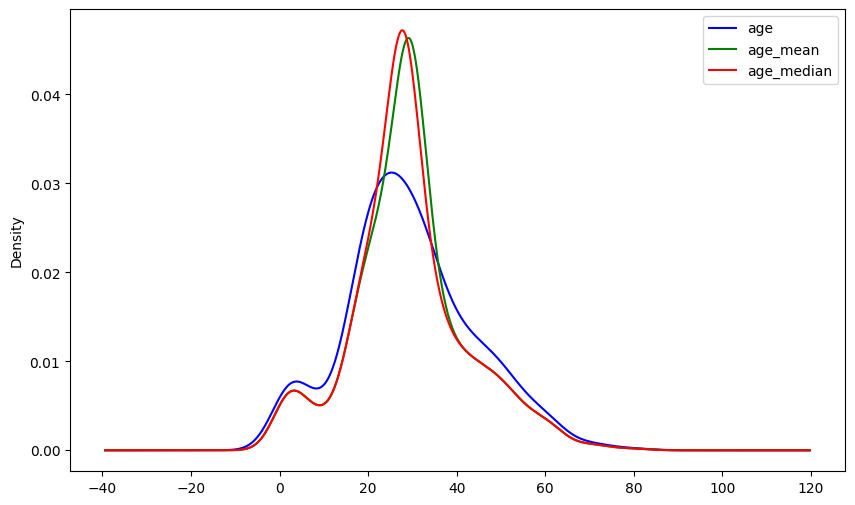

In [116]:
fig, ax = plt.subplots(figsize = (10,6))

x_tr['age'].plot(kind= 'kde', ax= ax, color='blue')
x_tr['age_mean'].plot(kind= 'kde', ax= ax, color='green')
x_tr['age_median'].plot(kind= 'kde', ax= ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

In [117]:
x_tr['age_random'] = x_tr['age']

random_sampling = (x_tr['age'].dropna().sample(x_tr['age'].isnull().sum()))
random_sampling.index = x_tr[lambda x:x['age'].isnull()].index

x_tr.loc[x_tr['age'].isnull(), 'age_random'] = random_sampling

x_tr[['age','age_random']].isnull().sum()

age           140
age_random      0
dtype: int64

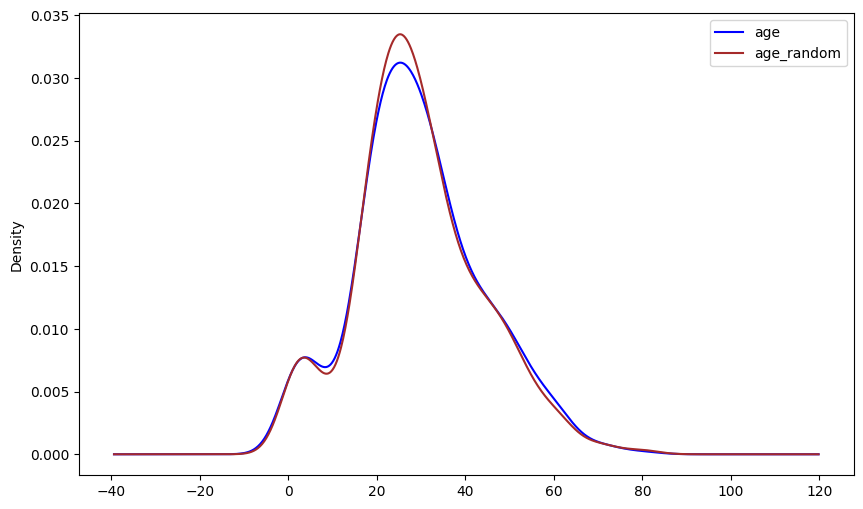

In [118]:
fig ,ax = plt.subplots(figsize = (10,6))

x_tr['age'].plot(kind= 'kde', ax= ax, color= 'blue')
x_tr['age_random'].plot(kind='kde', ax=ax, color = 'brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

age           37
age_random     0
dtype: int64


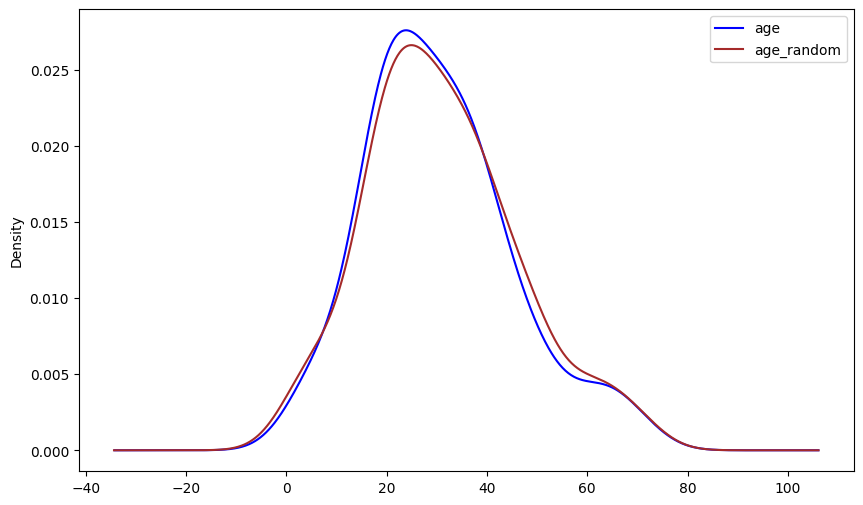

In [119]:
x_te['age_random'] =x_te['age']

random_sampling = (x_tr['age'].dropna().sample(x_te['age'].isnull().sum()))
random_sampling.index = x_te[lambda x:x['age'].isnull()].index

x_te.loc[x_te['age'].isnull(), 'age_random'] =random_sampling

print(x_te[['age','age_random']].isnull().sum())

fig,ax =plt.subplots(figsize=(10,6))

x_te['age'].plot(kind='kde', ax=ax, color='blue')
x_te['age_random'].plot(kind='kde', ax=ax, color='brown')

lines, labels =ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 범주형 치환

In [120]:
x_tr['embarked'].value_counts(dropna= False)

S      525
C      125
Q       60
NaN      2
Name: embarked, dtype: int64

In [121]:
# 최빈값
embarked_mode = x_tr['embarked'].mode().values[0]

# NA imputation
x_tr['embarked_filled'] = x_tr['embarked'].fillna(embarked_mode)
x_te['embarked_filled'] = x_te['embarked'].fillna(embarked_mode)

# 확인
print(x_tr[['embarked', 'embarked_filled']].isnull().sum())
print('-'*50)
print(x_te[['embarked', 'embarked_filled']].isnull().sum())

embarked           2
embarked_filled    0
dtype: int64
--------------------------------------------------
embarked           0
embarked_filled    0
dtype: int64


## sklearn 사용

### SimpleImputer 치환

In [122]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

x_tr['age_simple_mean'] = imputer.fit_transform(x_tr[['age']]) # age 평균값 구함
x_te['age_simple_mean'] = imputer.transform(x_te[['age']]) # 널 값에 평균값을 적용

x_tr[['age','age_simple_mean']].isnull().sum()

age                140
age_simple_mean      0
dtype: int64

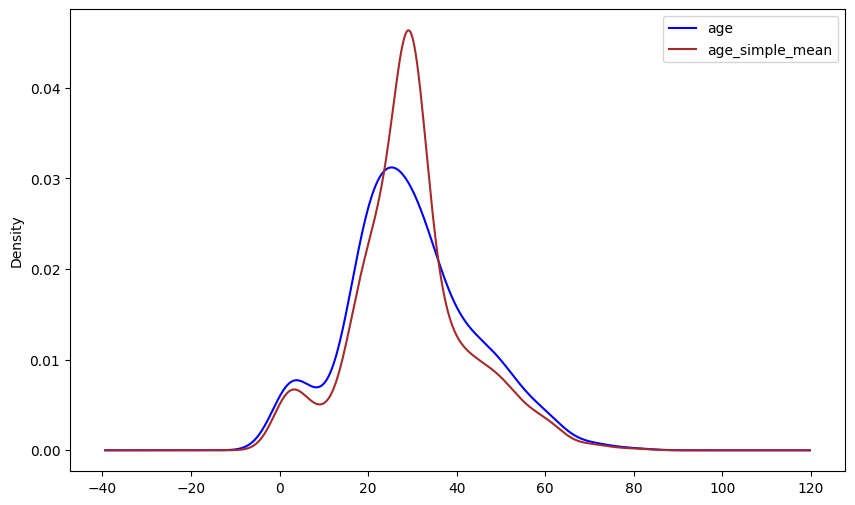

In [123]:
fig, ax = plt.subplots(figsize=(10,6))

x_tr['age'].plot(kind='kde', ax=ax, color='blue')
x_tr['age_simple_mean'].plot(kind='kde', ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### KNNImputer 모델 기반

In [124]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

x_tr['age_knn'] = imputer.fit_transform(x_tr[["age"]])
x_te['age_knn'] = imputer.transform(x_te[["age"]])

x_tr[["age","age_knn"]].isnull().sum()

age        140
age_knn      0
dtype: int64

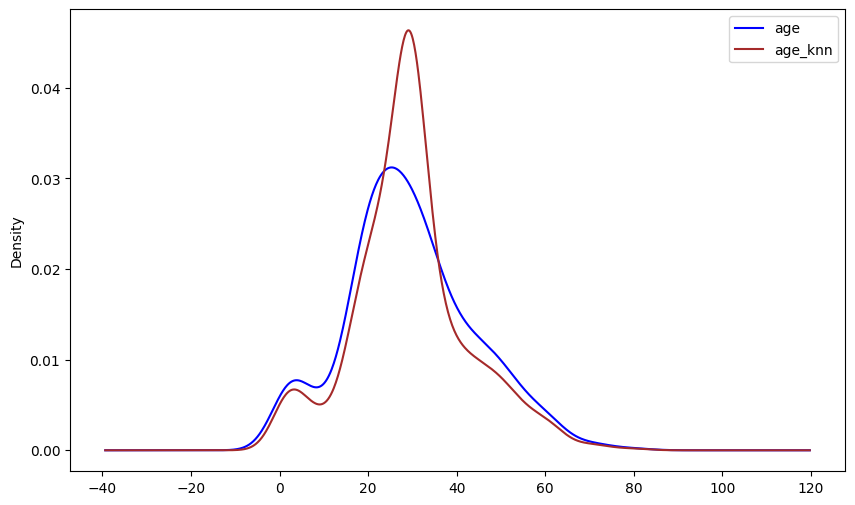

In [125]:
fig, ax = plt.subplots(figsize=(10,6))

x_tr['age'].plot(kind='kde', ax=ax, color='blue')
x_tr['age_knn'].plot(kind='kde', ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Iterativelmputer 모델 기반

In [126]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=SEED)

x_tr['age_iter_none'] = imputer.fit_transform(x_tr[['age']])
x_te['age_iter_none'] = imputer.transform(x_te[['age']])

x_tr[['age', 'age_iter_none']].isnull().sum()

age              140
age_iter_none      0
dtype: int64

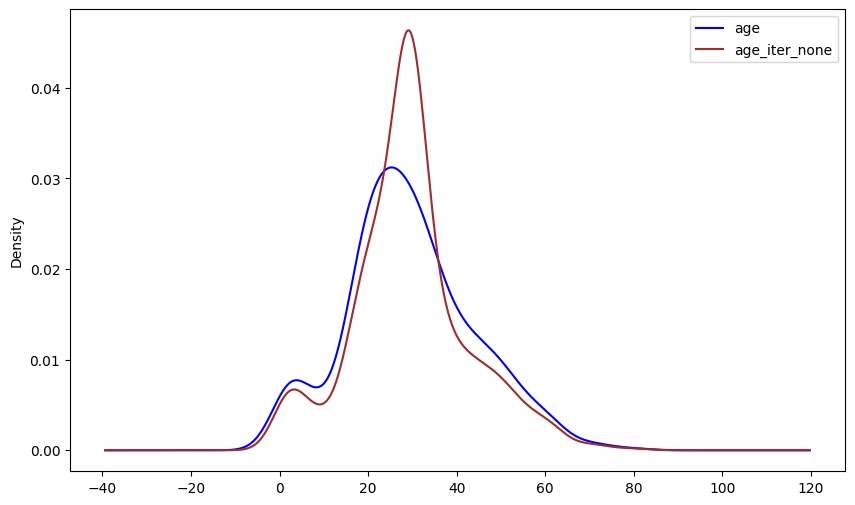

In [127]:
fig, ax = plt.subplots(figsize=(10,6))

x_tr['age'].plot(kind='kde', ax=ax, color='blue')
x_tr['age_iter_none'].plot(kind='kde', ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 랜덤 포레스트 기법

In [130]:
from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(estimator=RandomForestRegressor(verbose=0, random_state=SEED),
max_iter =10, verbose =0, imputation_order = 'ascending', random_state = SEED)

x_tr['age_iter_none'] = imputer.fit_transform(x_tr[['age']])
x_te['age_iter_none'] = imputer.transform(x_te[['age']])

x_tr[['age', 'age_iter_none']].isnull().sum()

age              140
age_iter_none      0
dtype: int64

# 비대칭 데이터

> 왜도, 첨도

### 비대칭 데이터 확인

In [132]:
# 왜도
train['fare'].skew()

4.787316519674893

In [134]:
# 첨도
train['fare'].kurt()

33.39814088089868

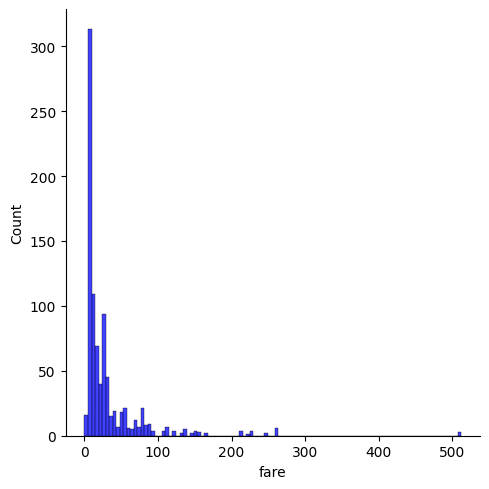

In [136]:
sns.displot(train['fare'], color='b', label = "skewness:  %.2f"%(train['fare'].skew()))

### 비대칭 데이터 처리

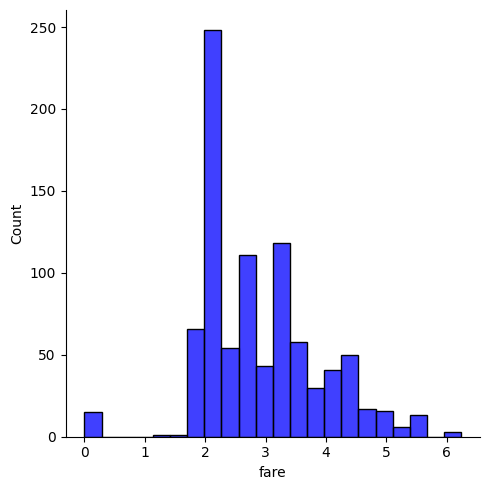

In [137]:
train['fare'] = train['fare'].map(lambda i :np.log(i) if i> 0 else 0) # log를 이용하여 처리
sns.displot(train['fare'], color = 'b', label = "skewness: %.2f"%(train['fare'].skew()))

In [138]:
train['fare'].skew(), train['fare'].kurt()

(0.44310881405404506, 0.641225603709215)

# 이상치

### 이상치 확인

In [139]:
train['age'].skew(), train['age'].kurt()

(0.38910778230082704, 0.17827415364210353)

<AxesSubplot: ylabel='fare'>

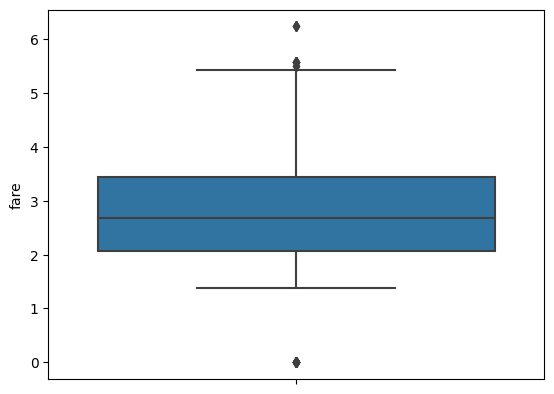

In [140]:
sns.boxplot(y=train['fare'], data = train)

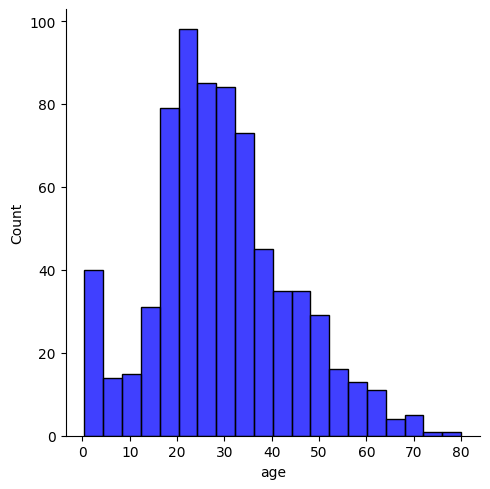

In [141]:
sns.displot(train['age'], color='b', label = 'skewness: %.2f'%(train['fare'].skew()))

<AxesSubplot: xlabel='survived', ylabel='age'>

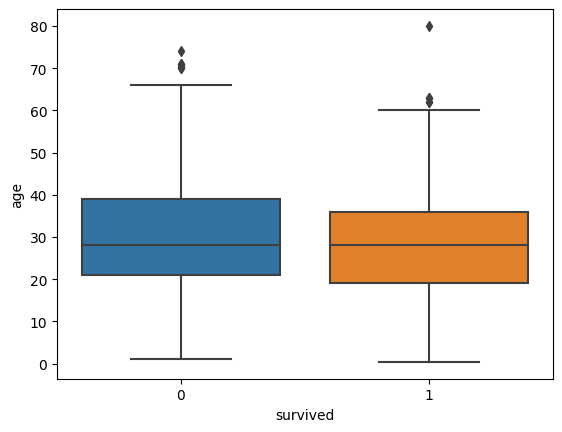

In [142]:
sns.boxplot(x=train['survived'], y=train['age'], data =train)

In [143]:
train.groupby(['survived'])['age'].quantile([0.25,0.75]) #분위수 계산

survived      
0         0.25    21.0
          0.75    39.0
1         0.25    19.0
          0.75    36.0
Name: age, dtype: float64

In [144]:
train['age'].quantile([0.25,0.5,0.75])

0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64

In [151]:
IQR = train['age'].quantile([0.25,0.75]).values[1] - train['age'].quantile([0.25,0.75]).values[0]
Upper_boundary = train['age'].median() + 1.5*IQR
Lower_boundary = train['age'].median() - 1.5*IQR

print('age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary= Lower_boundary,upperboundary= Upper_boundary))

age outliers are values < 1.1875 or > 54.8125


In [152]:
cond1 = train['age'] > Upper_boundary
cond2 = train['age'] < Lower_boundary

cond = cond1 | cond2
outlier = train.loc[cond]
print(outlier.shape, train.shape)
outlier.head()

(56, 11) (891, 11)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
11,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,3.279030,C103,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,2.772589,NaN,S
33,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,2.351375,NaN,S
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,4.126799,B30,C
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,3.367296,NaN,S


### 이상치 처리

In [153]:
train['age'] = train['age'].map(lambda x: Upper_boundary if x > Upper_boundary else x)
train['age'] = train['age'].map(lambda x: Lower_boundary if x < Lower_boundary else x)


In [154]:
cond1 = train['age'] > Upper_boundary
cond2 = train['age'] < Lower_boundary

cond = cond1 | cond2
outlier = train.loc[cond]
print(outlier.shape, train.shape)
outlier

(0, 11) (891, 11)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


<AxesSubplot: ylabel='age'>

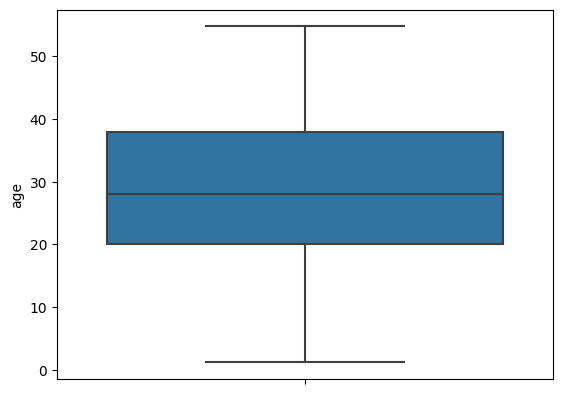

In [155]:
sns.boxplot(y= train['age'], data =train)

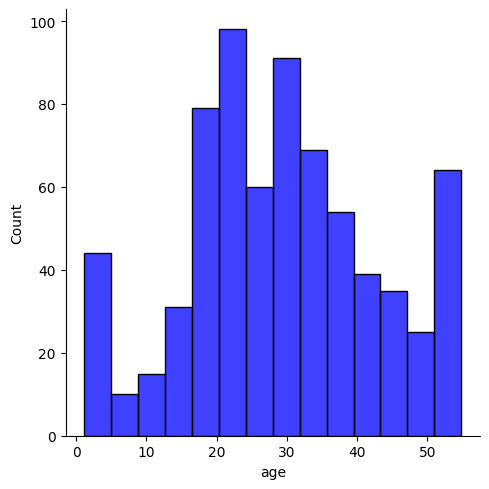

In [158]:
sns.displot(train["age"], color="b", label="Skewness : %.2f"%(train["age"].skew()))

<AxesSubplot: xlabel='survived', ylabel='age'>

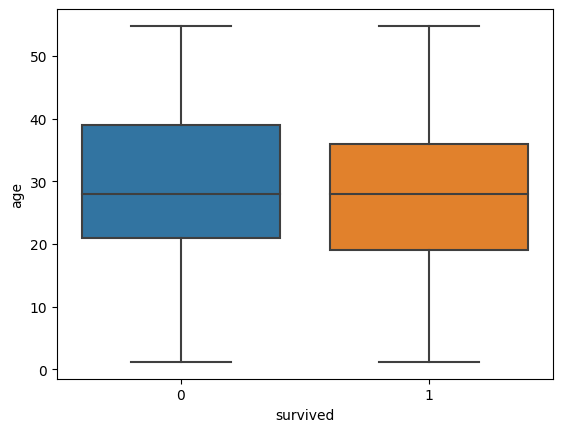

In [159]:
sns.boxplot(x = train['survived'], y=train['age'], data = train)